# Data-Driven Customer Insights: RFM Segmentation and Clustering Visualization

**Data Collection and Processing**

In [293]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [253]:
df=pd.read_excel('Online_Retail.xlsx')

In [ ]:
df.columns

In [254]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [255]:
df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df['Country'].value_counts(normalize=True)

In [256]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

In [ ]:
df.describe(include='all')

In [257]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Invoice monthh']=df['InvoiceDate'].dt.year*100+df['InvoiceDate'].dt.month
df['Date']=df['InvoiceDate'].dt.strftime('%Y-%m')

In [ ]:
df.loc[:, 'Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [258]:
df['Date']=pd.to_datetime(df['Date'])

In [259]:
df['Invoice monthh'].unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112])

In [260]:
df['revenue']=df['UnitPrice']*df['Quantity']

In [261]:
df = df.dropna(subset=['CustomerID'])


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397884 non-null  object        
 1   StockCode       397884 non-null  object        
 2   Description     397884 non-null  object        
 3   Quantity        397884 non-null  int64         
 4   InvoiceDate     397884 non-null  datetime64[ns]
 5   UnitPrice       397884 non-null  float64       
 6   CustomerID      397884 non-null  float64       
 7   Country         397884 non-null  object        
 8   Invoice monthh  397884 non-null  int32         
 9   Date            397884 non-null  datetime64[ns]
 10  revenue         397884 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(1), object(4)
memory usage: 34.9+ MB


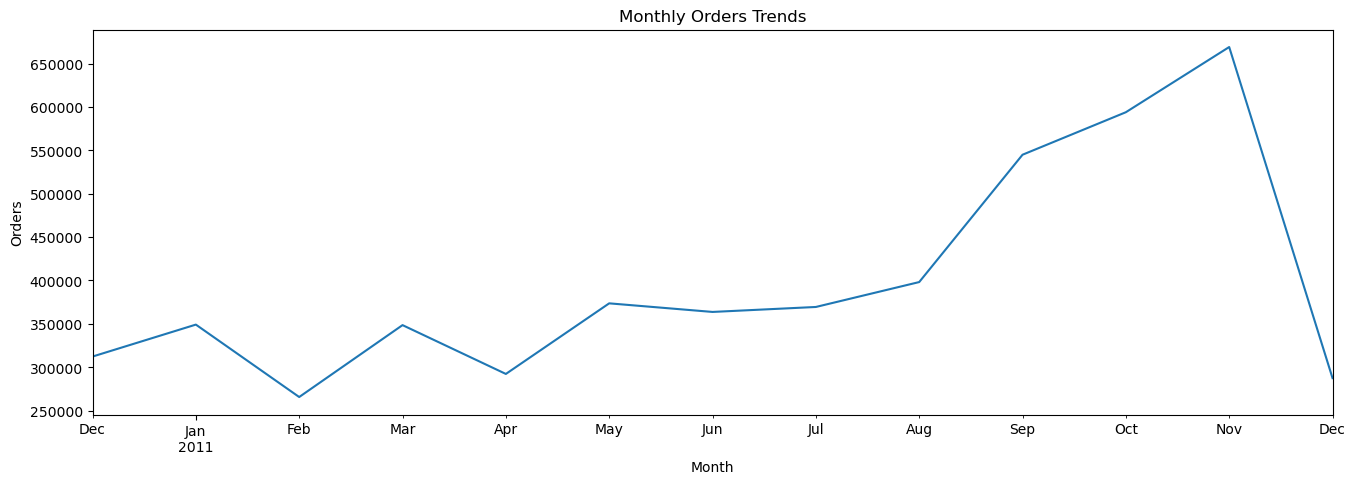

In [263]:
df_aggregated = df.groupby(df['Date'].dt.to_period('M'))['Quantity'].sum()
df_aggregated.plot(kind='line', figsize=(16, 5), title='Monthly Orders Trends')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.show()

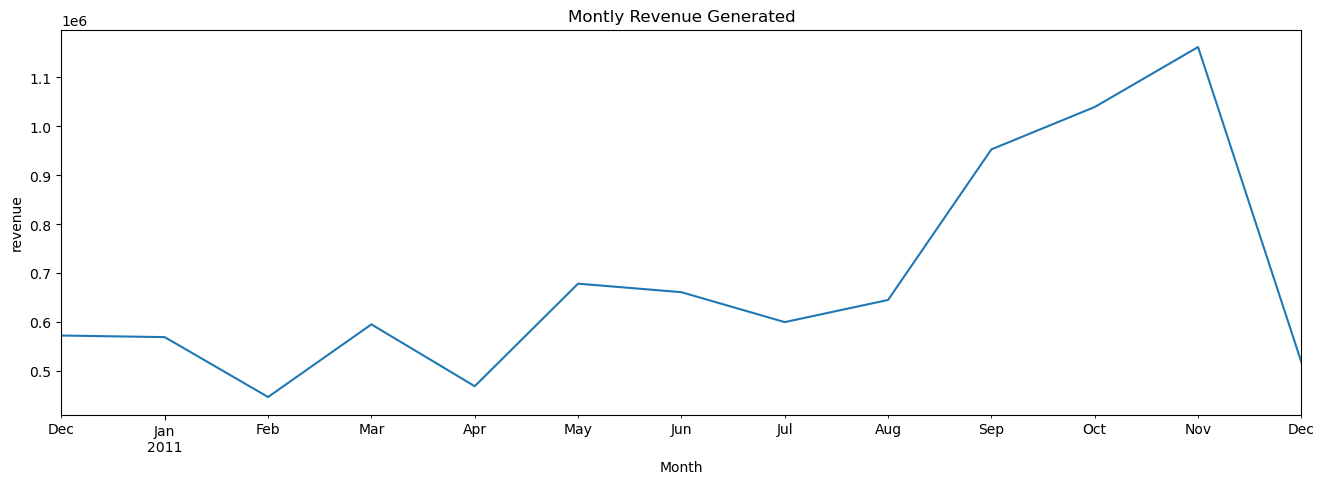

In [264]:
df_aggprof=df.groupby(df['Date'].dt.to_period('M'))['revenue'].sum()
df_aggprof.plot(kind='line',figsize=(16,5),title="Montly Revenue Generated")
plt.xlabel('Month')
plt.ylabel('revenue')
plt.show()

In [265]:
NOW = pd.to_datetime('2011-12-9') 
#df.loc[:,'Date'] = pd.DatetimeIndex(df.InvoiceDate).date

# RFM ANALYSIS

In [266]:
def_merge_RFM = df.groupby(['CustomerID']).agg({
    'Date': lambda x: (NOW - max(x)).days,
    'InvoiceNo': lambda x: x.count(),
    'revenue': 'sum'
}).rename(columns={
    'Date': 'Recency',
    'InvoiceNo': 'Frequency',
    'revenue': 'Monetary'
}).reset_index()

In [267]:
def_merge_RFM.describe(include='all')

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,106.036883,91.720609,2054.266460
std,1721.808492,100.096578,228.785094,8989.230441
min,12346.000000,8.000000,1.000000,3.750000
25%,13813.250000,38.000000,17.000000,307.415000
50%,15299.500000,69.000000,41.000000,674.485000
75%,16778.750000,161.000000,100.000000,1661.740000
max,18287.000000,373.000000,7847.000000,280206.020000


In [ ]:
def_merge_RFM['Frequency'].describe(include='all')

In [ ]:
plt.hist(def_merge_RFM['Frequency'],bins=100,color='skyblue',edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [ ]:
def_merge_RFM.loc[def_merge_RFM['Frequency']<7847.000000]

In [269]:
def_merge_RFM['R_Score']=pd.qcut(def_merge_RFM['Recency'],4,labels=[4,3,2,1])
def_merge_RFM['F_Score']=pd.qcut(def_merge_RFM['Frequency'],4,labels=[1,2,3,4])
def_merge_RFM['M_Score']=pd.qcut(def_merge_RFM['Monetary'].rank(method='first'),4,labels=[1,2,3,4])

In [270]:
def_merge_RFM[['Recency','Frequency','Monetary']]

,Recency,Frequency,Monetary
0,342,1,77183.60
1,8,182,4310.00
2,99,31,1797.24
3,38,73,1757.55
4,311,17,334.40
...,...,...,...
4333,283,10,180.60
4334,191,7,80.82
4335,8,12,178.05
4336,8,756,2094.88


## Distribution & Skewness Analysis of RFM Features

Recency
1.189802448602801
Frequency
18.09990377360193
Monetary
19.31827038422538


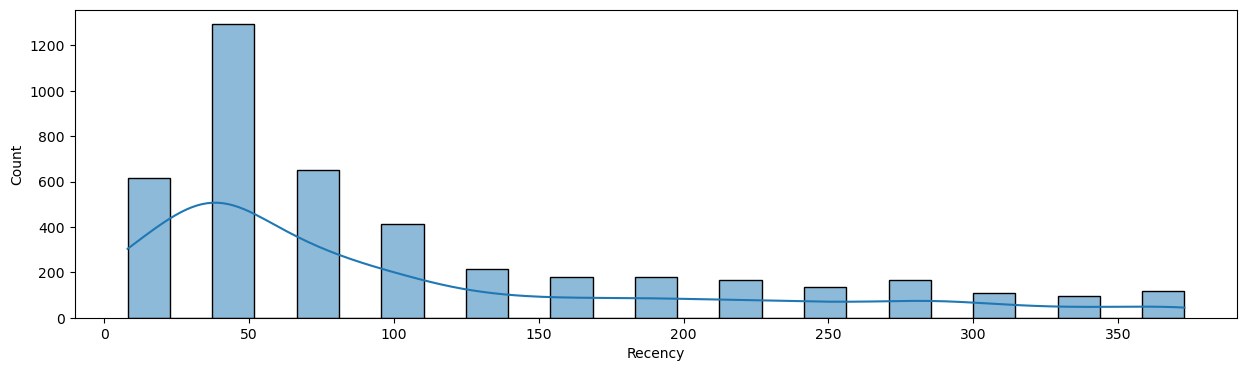

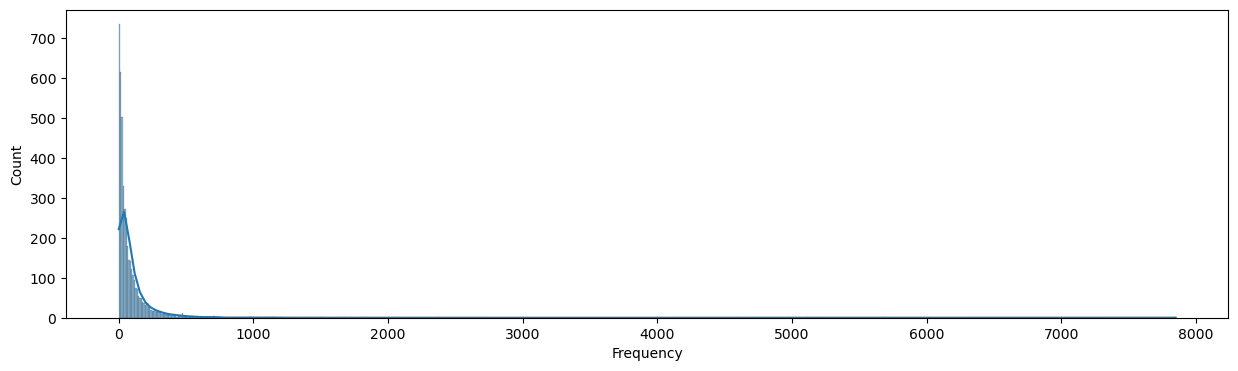

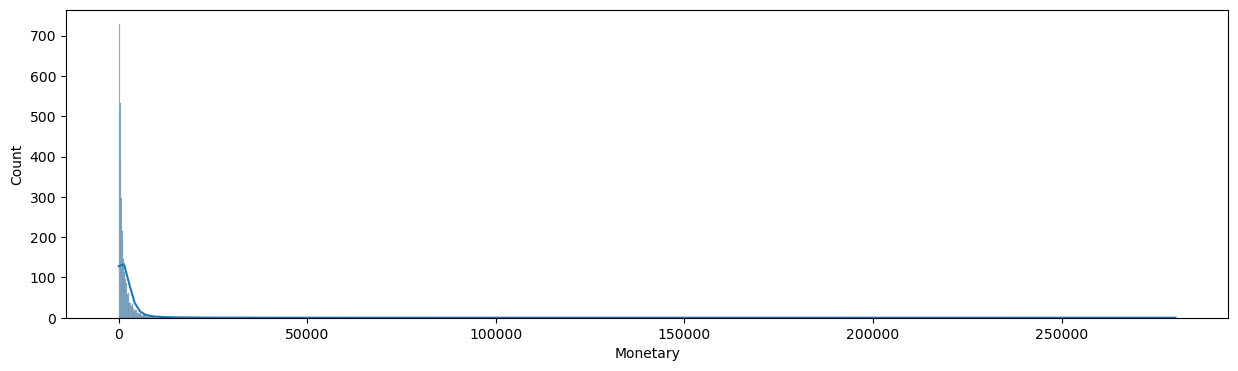

In [271]:
for cols in def_merge_RFM[['Recency','Frequency','Monetary']]:
    print(cols)
    print(skew(def_merge_RFM[cols]))
    plt.figure(figsize=(15, 4))
    sns.histplot(def_merge_RFM[cols],kde=True)
    plt.show

# Finding outliers (But not excluding as they are important data)

In [272]:
upper_limit=def_merge_RFM['Frequency'].mean()+4*def_merge_RFM['Frequency'].std()
Lower_limit=def_merge_RFM['Frequency'].mean()-3*def_merge_RFM['Frequency'].std()
def_merge_RFM[def_merge_RFM['Frequency']<upper_limit].describe()
print(upper_limit)
def_merge_RFM[def_merge_RFM['Frequency']>upper_limit]

1006.8609840684612


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
326,12748.0,8,4595,33719.73,4,4,4
558,13081.0,38,1024,28337.38,4,4,4
562,13089.0,8,1818,58825.83,4,4,4
690,13263.0,8,1677,7454.07,4,4,4
1262,14056.0,8,1106,8214.65,4,4,4
1289,14096.0,8,5111,65164.79,4,4,4
1333,14156.0,38,1400,117379.63,4,4,4
1336,14159.0,38,1204,4693.01,4,4,4
1434,14298.0,8,1637,51527.30,4,4,4
1661,14606.0,8,2700,12156.65,4,4,4


In [273]:
upper_limit=def_merge_RFM['Monetary'].mean()+4*def_merge_RFM['Monetary'].std()
Lower_limit=def_merge_RFM['Monetary'].mean()-3*def_merge_RFM['Monetary'].std()
def_merge_RFM[def_merge_RFM['Monetary']<upper_limit].describe()
print(upper_limit)
def_merge_RFM[def_merge_RFM['Monetary']>upper_limit]

38011.18822547458


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,342,1,77183.60,1,1,4
55,12415.0,38,714,124914.53,4,4,4
453,12931.0,38,82,42055.96,4,3,4
562,13089.0,8,1818,58825.83,4,4,4
996,13694.0,8,568,65039.62,4,4,4
1284,14088.0,38,589,50491.81,4,4,4
1289,14096.0,8,5111,65164.79,4,4,4
1333,14156.0,38,1400,117379.63,4,4,4
1434,14298.0,8,1637,51527.30,4,4,4
1689,14646.0,8,2076,280206.02,4,4,4


In [274]:
new_RFM=def_merge_RFM[['CustomerID','Recency','Frequency','Monetary']]

# Using Transformer techniquies to reduce Skewness

In [275]:
pt=PowerTransformer(method='box-cox')
Distrbuted_RFM=pt.fit_transform(def_merge_RFM[['Recency','Frequency','Monetary']])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Distrbuted_RFM)
scaled_data = pd.DataFrame(scaled_data, columns=['Recency', 'Frequency', 'Monetary'])
scaled_data

,Recency,Frequency,Monetary
0,1.686527,-2.571781,3.144114
1,-1.699646,1.166178,1.376049
2,0.328783,-0.218983,0.749774
3,-0.544464,0.435521,0.733175
4,1.572288,-0.661173,-0.591544
...,...,...,...
4333,1.460626,-1.040524,-1.132293
4334,1.013671,-1.289754,-1.881490
4335,-1.699646,-0.911347,-1.145109
4336,-1.699646,2.375887,0.862847


In [279]:
print(pt.lambdas_)

[ 0.16602216  0.05145942 -0.08397494]


-0.04710028743474892
0.004133874001776541
-0.015825585488543244


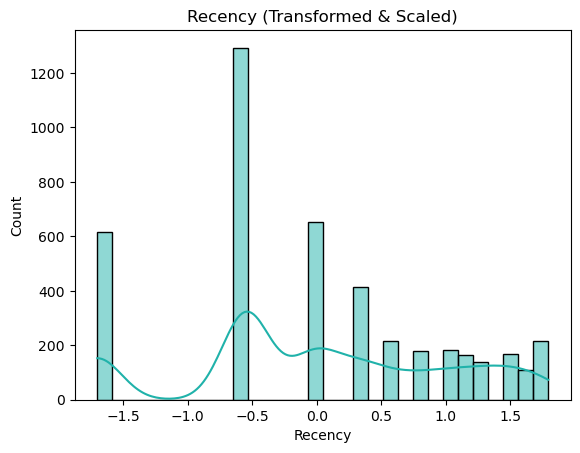

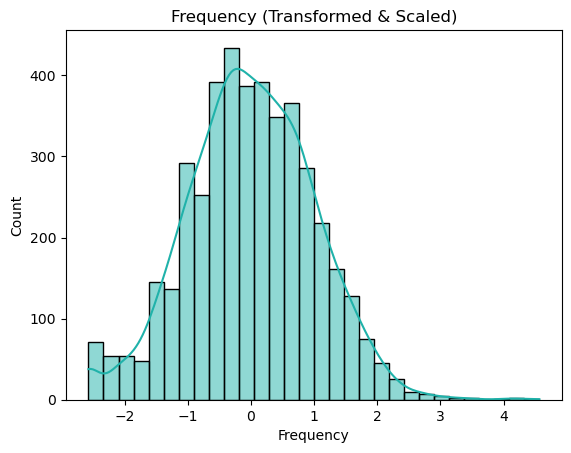

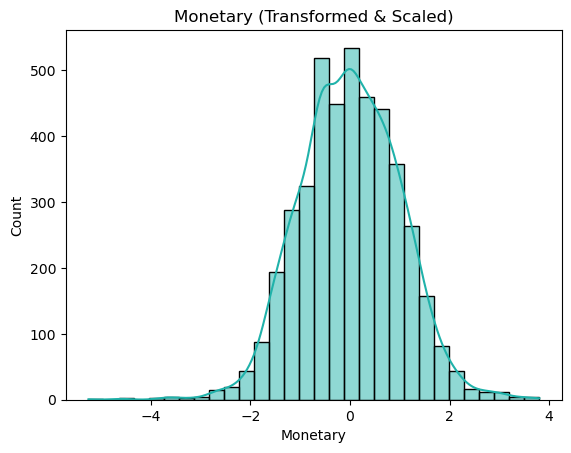

In [251]:
Distrbuted_RFM1=pd.DataFrame(Distrbuted_RFM, columns=['Recency', 'Frequency', 'Monetary'])
for i, col in enumerate(Distrbuted_RFM1.columns):
    plt.figure()
    sns.histplot(Distrbuted_RFM1[col], kde=True, bins=30, color='lightseagreen')
    plt.title(f'{col} (Transformed & Scaled)')
    plt.xlabel(col)
    print(skew(Distrbuted_RFM1[col]))


plt.show()

In [ ]:
scaled_data1=scaled_data['Recency', 'Frequency']

# Elbow Curve

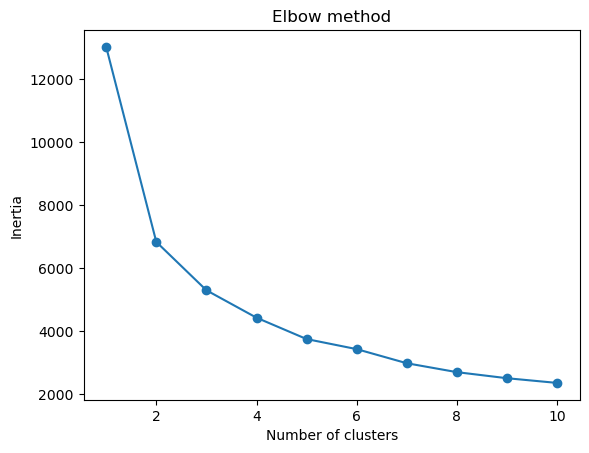

In [277]:
inertia =[]
for k in range(1,11):
    k_means=KMeans(n_clusters=k,init='k-means++',random_state=0)
    k_means.fit(scaled_data)
    inertia.append(k_means.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [278]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data) 
    score = silhouette_score(scaled_data, kmeans.labels_)
    print(f"For k={k}, Silhouette Score = {score:.4f}")

For k=2, Silhouette Score = 0.3921
For k=3, Silhouette Score = 0.2999
For k=4, Silhouette Score = 0.2987
For k=5, Silhouette Score = 0.2831
For k=6, Silhouette Score = 0.2892
For k=7, Silhouette Score = 0.2725
For k=8, Silhouette Score = 0.2879
For k=9, Silhouette Score = 0.2844
For k=10, Silhouette Score = 0.2702


In [282]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

def_merge_RFM['Cluster'] = kmeans.labels_

In [288]:
def_merge_RFM
Clusters_RFM=def_merge_RFM
Clusters_RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Cluster
0,12346.0,342,1,77183.60,1,1,4,1
1,12347.0,8,182,4310.00,4,4,4,2
2,12348.0,99,31,1797.24,2,2,4,1
3,12349.0,38,73,1757.55,4,3,4,2
4,12350.0,311,17,334.40,1,1,2,0


In [292]:
Clusters_RFM.to_csv('Clusters_RFM1.csv')

In [249]:
cluster_summary = def_merge_RFM.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].describe()
cluster_summary

Recency                                                          \
          count        mean         std  min   25%    50%    75%    max   
Cluster                                                                   
0        1340.0  205.720149  104.365074  8.0  99.0  222.0  283.0  373.0   
1        1834.0   80.125954   61.899492  8.0  38.0   69.0   99.0  373.0   
2        1164.0   32.106529   28.391696  8.0   8.0   38.0   38.0  373.0   

        Frequency              ...                 Monetary               \
            count        mean  ...     75%     max    count         mean   
Cluster                        ...                                         
0          1340.0   15.092537  ...   20.00   105.0   1340.0   283.587754   
1          1834.0   51.737732  ...   68.00   260.0   1834.0   972.683508   
2          1164.0  242.932131  ...  269.25  7847.0   1164.0  5796.820241   

                                                                          
                  std     min        25%       50%        75%        max  
Cluster                                                                   
0          247.678800    3.75   138.9050   226.290   353.2500    3811.95  
1         2372.389136   89.94   430.2325   700.680  1098.7050   77183.60  
2        16520.330940  452.24  1792.7675  2712.235  4610.3525  280206.02  

[3 rows x 24 columns]

# Clusters Visualization 

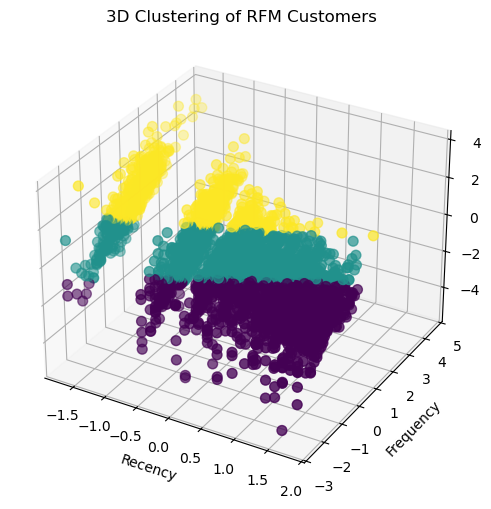

In [250]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    scaled_data['Recency'],
    scaled_data['Frequency'],
    scaled_data['Monetary'],
    c=def_merge_RFM['Cluster'].values,
    cmap='viridis',
    s=50
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("3D Clustering of RFM Customers")
plt.show()
